In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
print(train_df.head())

                     ID        date cluster_id  electricity_consumption  \
0  cluster_1_2014-01-01  2014-01-01  cluster_1                  358.032   
1  cluster_2_2014-01-01  2014-01-01  cluster_2                  548.247   
2  cluster_3_2014-01-01  2014-01-01  cluster_3                  758.303   
3  cluster_4_2014-01-01  2014-01-01  cluster_4                 1072.077   
4  cluster_1_2014-01-02  2014-01-02  cluster_1                  386.908   

   temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
0                10.8                 4.2                       5.5   
1                12.2                 4.3                       8.6   
2                12.9                -0.8                      10.1   
3                10.8                 4.7                       6.7   
4                10.7                 7.0                       6.6   

   apparent_temperature_min  sunshine_duration  daylight_duration  \
0                       0.4          53.003333       

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [ ]:
print(train_df.describe())

       electricity_consumption  temperature_2m_max  temperature_2m_min  \
count             11688.000000        11688.000000        11688.000000   
mean                642.313328           18.733385            7.174786   
std                 287.673473            7.504161            5.960263   
min                 207.472000           -1.900000          -10.800000   
25%                 414.376000           12.800000            2.500000   
50%                 602.672000           18.200000            7.100000   
75%                 836.034500           24.300000           12.100000   
max                1658.348000           40.900000           23.200000   

       apparent_temperature_max  apparent_temperature_min  sunshine_duration  \
count              11688.000000              11688.000000       11688.000000   
mean                  17.215315                  4.784608       29302.656241   
std                    9.085303                  7.260336       13600.113712   
min          

In [ ]:
# Pastikan kolom 'date' menjadi tipe datetime agar bisa di-plot
train_df['date'] = pd.to_datetime(train_df['date'])

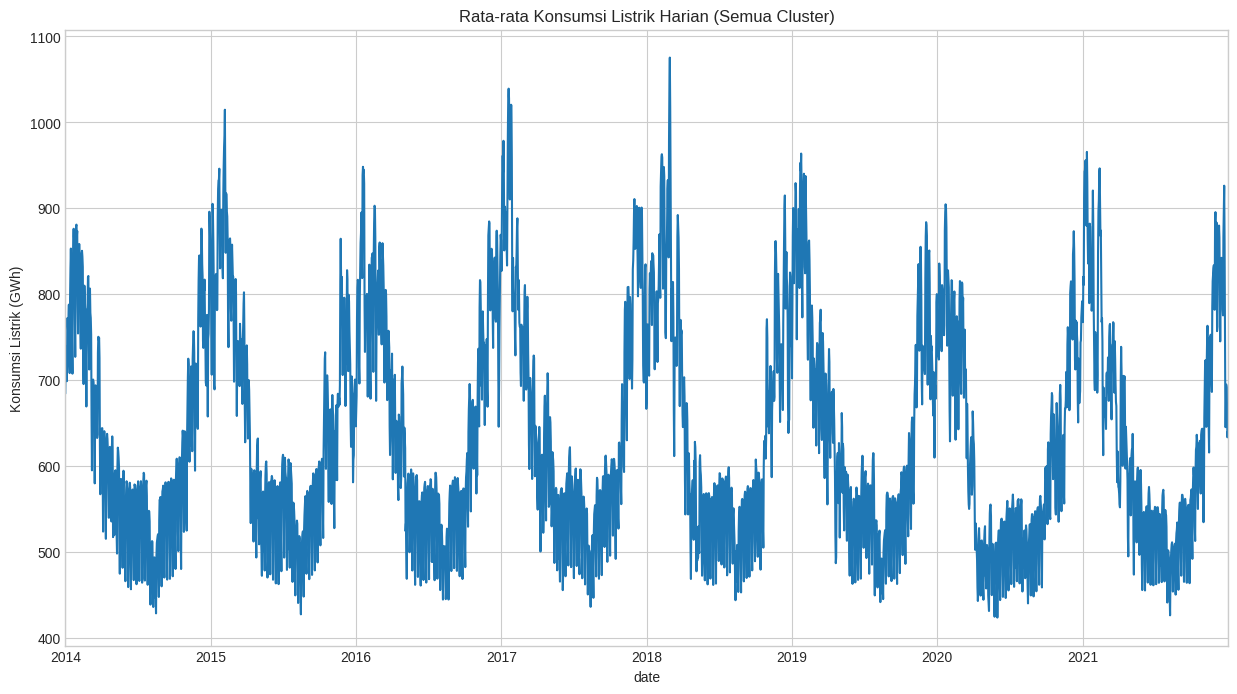

In [ ]:
# plot rata-rata konsumsi listrik dari semua cluster per hari
daily_consumption = train_df.groupby('date')['electricity_consumption'].mean()

daily_consumption.plot(title='Rata-rata Konsumsi Listrik Harian (Semua Cluster)',
                       ylabel='Konsumsi Listrik (GWh)')
plt.show()

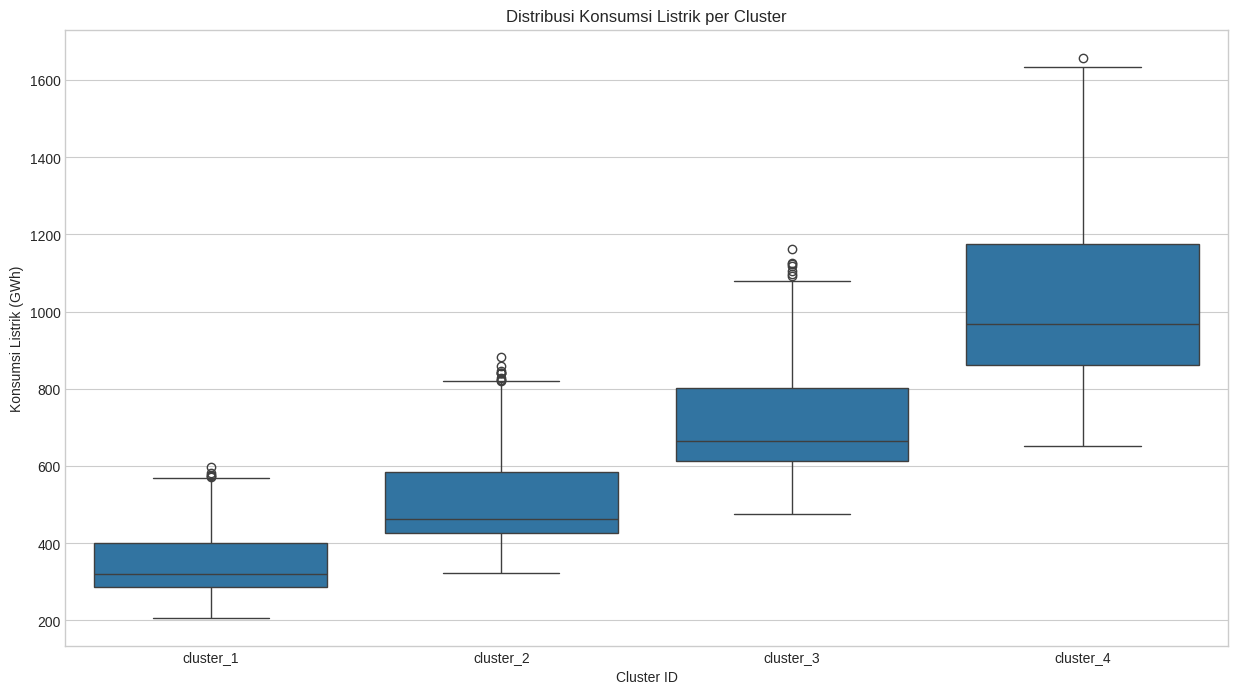

In [ ]:
# Gunakan boxplot untuk membandingkan distribusi konsumsi di setiap cluster
sns.boxplot(x='cluster_id', y='electricity_consumption', data=train_df, order=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])
plt.title('Distribusi Konsumsi Listrik per Cluster')
plt.ylabel('Konsumsi Listrik (GWh)')
plt.xlabel('Cluster ID')
plt.show()

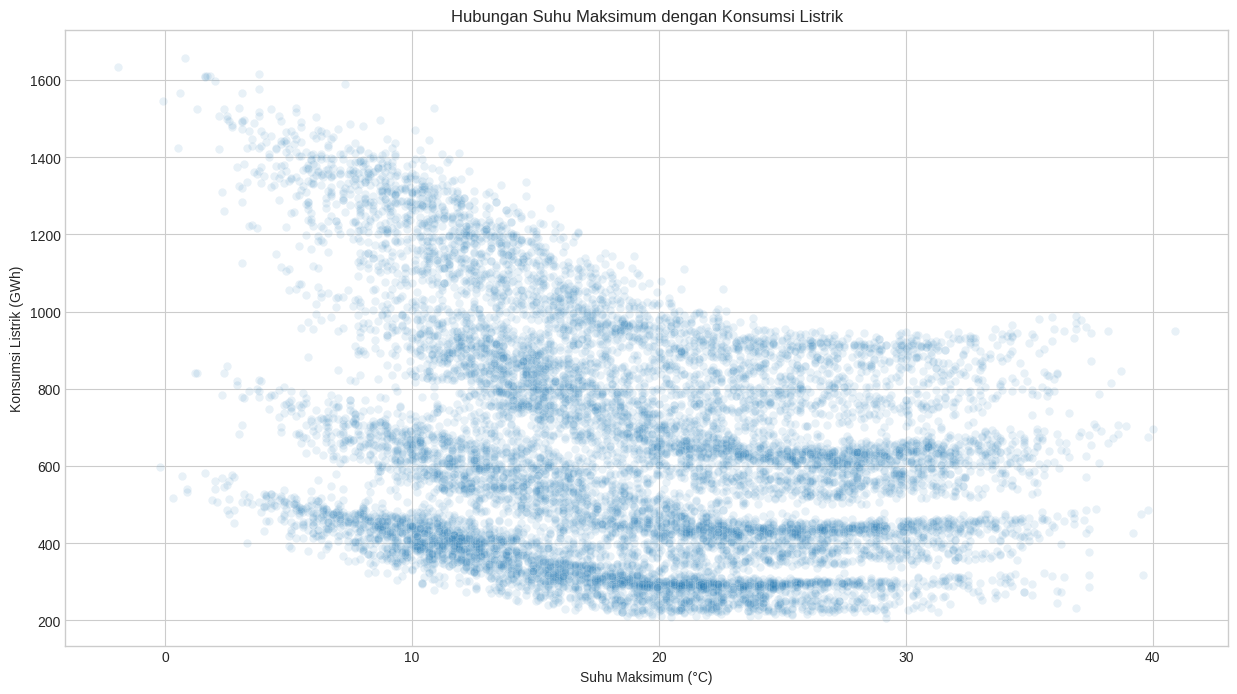

In [ ]:
# Gunakan scatter plot untuk melihat hubungan antara suhu maks dan konsumsi
sns.scatterplot(x='temperature_2m_max', y='electricity_consumption', data=train_df, alpha=0.1)
plt.title('Hubungan Suhu Maksimum dengan Konsumsi Listrik')
plt.xlabel('Suhu Maksimum (°C)')
plt.ylabel('Konsumsi Listrik (GWh)')
plt.show()

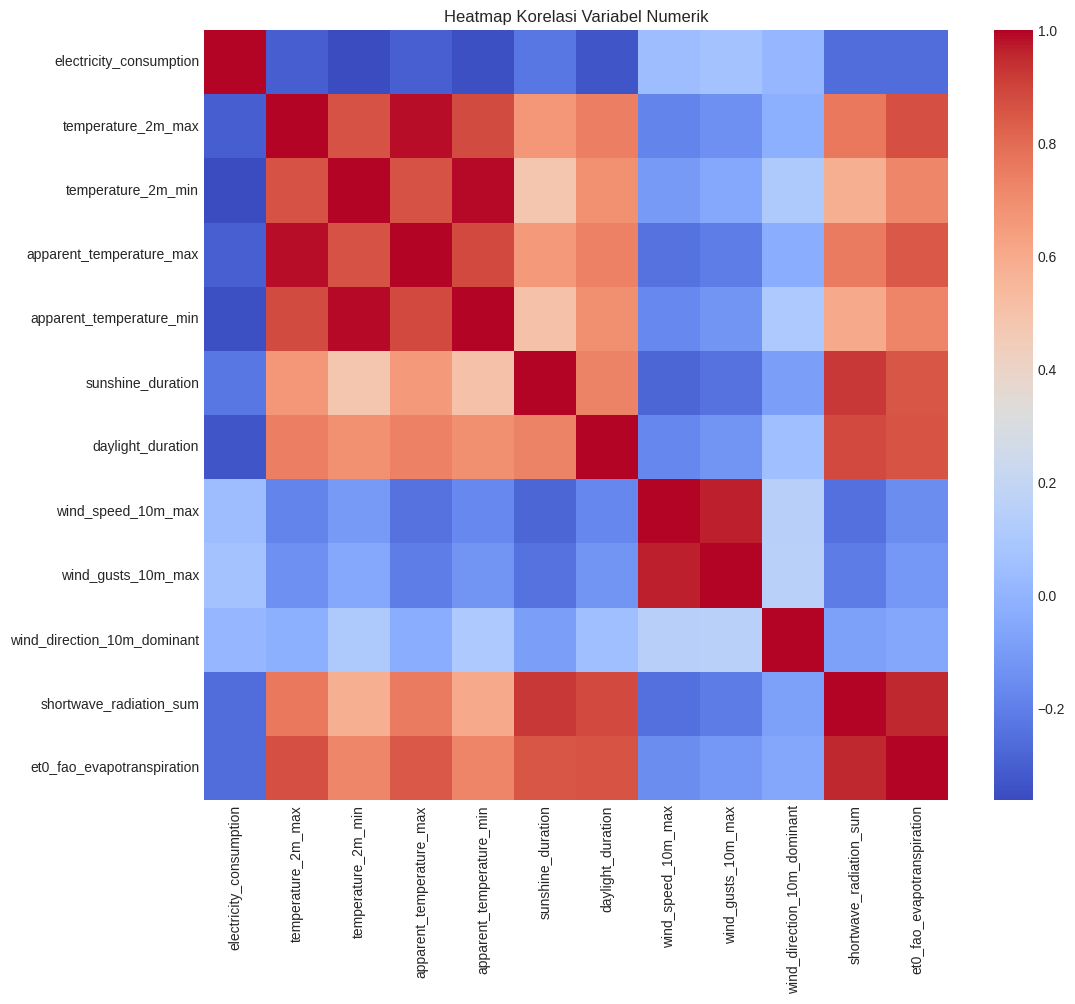

In [ ]:
# memilih hanya kolom numerik (termasuk target)
numeric_cols = train_df.select_dtypes(include=['number'])

# matriks korelasi
correlation_matrix = numeric_cols.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [ ]:
#fungsi agar prosesnya rapi dan bisa dipakai ulang untuk data test
def preprocess(df):
    # Salin dataframe agar data asli tidak berubah
    df = df.copy()

    # --- Menerjemahkan kolom 'date' ---
    # Ubah tipenya menjadi datetime
    df['date'] = pd.to_datetime(df['date'])

    # Ekstrak informasi waktu menjadi kolom angka baru
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek  # 0=Senin, 6=Minggu
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)

    # Kolom 'date' asli sudah tidak kita perlukan lagi
    df = df.drop('date', axis=1)

    # --- Menerjemahkan kolom 'cluster_id' ---
    # Gunakan One-Hot Encoding (pd.get_dummies)
    cluster_dummies = pd.get_dummies(df['cluster_id'], prefix='cluster')
    df = pd.concat([df, cluster_dummies], axis=1)

    # Kolom 'cluster_id' asli juga sudah tidak diperlukan
    df = df.drop('cluster_id', axis=1)

    return df

# menerapkan fungsi 'penerjemah' ini ke data train dan test
train_processed = preprocess(train_df)
test_processed = preprocess(test_df)

print("Data Latih setelah 'diterjemahkan' (diproses):")
print(train_processed.head())

Data Latih setelah 'diterjemahkan' (diproses):
                     ID  electricity_consumption  temperature_2m_max  \
0  cluster_1_2014-01-01                  358.032                10.8   
1  cluster_2_2014-01-01                  548.247                12.2   
2  cluster_3_2014-01-01                  758.303                12.9   
3  cluster_4_2014-01-01                 1072.077                10.8   
4  cluster_1_2014-01-02                  386.908                10.7   

   temperature_2m_min  apparent_temperature_max  apparent_temperature_min  \
0                 4.2                       5.5                       0.4   
1                 4.3                       8.6                      -0.4   
2                -0.8                      10.1                      -4.9   
3                 4.7                       6.7                       0.6   
4                 7.0                       6.6                       3.3   

   sunshine_duration  daylight_duration  wind_speed_10m_m

In [ ]:
# 1. menentukan nama kolom target
target_col = 'electricity_consumption'

# 2. buat daftar nama semua kolom fitur
# Caranya: ambil semua nama kolom dari data latih yang sudah diproses,
# lalu HAPUS kolom target dan kolom ID.
features = train_processed.drop([target_col, 'ID'], axis=1).columns.tolist()

# 3. buat set data untuk training dan testing
# X_train berisi semua 'bahan' dari data latih
X_train = train_processed[features]

# y_train berisi 'resep hasil akhir' dari data latih
y_train = train_processed[target_col]

# X_test berisi 'bahan' dari data uji. Kita pastikan kolomnya sama persis
# dengan X_train untuk konsistensi.
X_test = test_processed[features]

print("Fitur yang akan digunakan model:")
print(features)

print("\n--- Ukuran Data ---")
print(f"Bahan Latih (X_train): {X_train.shape[0]} baris, {X_train.shape[1]} kolom")
print(f"Target Latih (y_train): {y_train.shape[0]} nilai")
print(f"Bahan Uji (X_test):   {X_test.shape[0]} baris, {X_test.shape[1]} kolom")

Fitur yang akan digunakan model:
['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'cluster_cluster_1', 'cluster_cluster_2', 'cluster_cluster_3', 'cluster_cluster_4']

--- Ukuran Data ---
Bahan Latih (X_train): 11688 baris, 21 kolom
Target Latih (y_train): 11688 nilai
Bahan Uji (X_test):   3400 baris, 21 kolom


In [ ]:
# Impor library model
import lightgbm as lgb
lgbm_model = lgb.LGBMRegressor(random_state=42)

# mulai proses training dengan metode .fit()
print("Menggunakan model untuk memprediksi data uji...")

lgbm_model.fit(X_train, y_train)

print("\nPrediksi berhasil dibuat!")

Menggunakan model untuk memprediksi data uji...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3161
[LightGBM] [Info] Number of data points in the train set: 11688, number of used features: 21
[LightGBM] [Info] Start training from score 642.313328

Prediksi berhasil dibuat!


In [ ]:
# Gunakan model yang SUDAH DILATIH dari sel di atas
# untuk membuat prediksi pada data uji (X_test)
predictions = lgbm_model.predict(X_test)

# Tampilkan 5 hasil prediksi pertama
print("Berikut adalah 5 hasil prediksi pertama:")
print(predictions[:5])

Berikut adalah 5 hasil prediksi pertama:
[286.92857179 476.59095555 666.56040222 990.65540392 347.93296615]


In [ ]:
# dataframe baru
submission_df = pd.DataFrame()

# Kolom pertama: 'ID'. Kita salin dari data test asli (test_df)
# Ini PENTING agar setiap prediksi cocok dengan ID yang benar.
submission_df['ID'] = test_df['ID']

# Kolom kedua: 'electricity_consumption'. Kita isi dengan hasil prediksi kita.
submission_df['electricity_consumption'] = predictions

# pastikan tidak ada nilai negatif.
submission_df.loc[submission_df['electricity_consumption'] < 0, 'electricity_consumption'] = 0

# Simpan DataFrame ini ke dalam file CSV.
submission_df.to_csv('submission.csv', index=False)

print("File 'submission.csv' telah berhasil dibuat.")
print("\n5 baris pertama dari file submission Anda:")
print(submission_df.head())

File 'submission.csv' telah berhasil dibuat.

5 baris pertama dari file submission Anda:
                     ID  electricity_consumption
0  cluster_1_2022-01-01               286.928572
1  cluster_2_2022-01-01               476.590956
2  cluster_3_2022-01-01               666.560402
3  cluster_4_2022-01-01               990.655404
4  cluster_1_2022-01-02               347.932966


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. BAGI DATA LATIH KITA (X_train dan y_train yang sudah kita buat sebelumnya)
# 80% untuk training (split) dan 20% untuk validasi (val)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Data untuk training baru: {X_train_split.shape[0]} baris")
print(f"Data untuk validasi/try-out: {X_val.shape[0]} baris")


# 2. LATIH MODEL BARU (HANYA PADA DATA 80%)
print("\nMelatih model khusus untuk validasi...")
validation_model = lgb.LGBMRegressor(random_state=42)
validation_model.fit(X_train_split, y_train_split)
print("Model validasi selesai dilatih!")


# 3. BUAT PREDIKSI PADA DATA VALIDASI (DATA 20%)
print("\nMembuat prediksi pada data validasi...")
val_predictions = validation_model.predict(X_val)


# RMSE
mse = mean_squared_error(y_val, val_predictions)

# RMSE adalah akar kuadrat dari MSE
rmse = np.sqrt(mse)

print("\n--- HASIL PERFORMA MODEL ---")
print(f"RMSE pada Validation Set: {rmse:.4f}")

Data untuk training baru: 9350 baris
Data untuk validasi/try-out: 2338 baris

Melatih model khusus untuk validasi...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3141
[LightGBM] [Info] Number of data points in the train set: 9350, number of used features: 21
[LightGBM] [Info] Start training from score 641.053793
Model validasi selesai dilatih!

Membuat prediksi pada data validasi...

--- HASIL PERFORMA MODEL ---
RMSE pada Validation Set: 23.5088


In [ ]:
# menghitung rata-rata per cluster
avg_consumption = train_df.groupby('cluster_id')['electricity_consumption'].mean().sort_values()
print(avg_consumption)

# menghitung rasio terhadap cluster terkecil (cluster_1)
base_cluster_avg = avg_consumption['cluster_1']
ratios = avg_consumption / base_cluster_avg
print("\nRasio Perbandingan terhadap Cluster 1:")
print(ratios)

cluster_id
cluster_1     340.734297
cluster_2     503.367172
cluster_3     706.762751
cluster_4    1018.389092
Name: electricity_consumption, dtype: float64

Rasio Perbandingan terhadap Cluster 1:
cluster_id
cluster_1    1.000000
cluster_2    1.477301
cluster_3    2.074234
cluster_4    2.988807
Name: electricity_consumption, dtype: float64


In [ ]:
# analisis
temp_min_p25 = train_df['temperature_2m_min'].quantile(0.25)
sunshine_avg = train_df['sunshine_duration'].mean()

# Filter data berdasarkan kondisi "dingin dan gelap"
cold_dark_condition = (train_df['temperature_2m_min'] < temp_min_p25) & (train_df['sunshine_duration'] < sunshine_avg)
cold_dark_df = train_df[cold_dark_condition]

# Hitung konsumsi rata-rata pada kondisi tersebut
avg_consumption_cold_dark = cold_dark_df.groupby('cluster_id')['electricity_consumption'].mean()
print(f"Batas suhu minimum (P25): {temp_min_p25:.2f}°C")
print(f"Batas rata-rata durasi matahari: {sunshine_avg:.2f} detik")
print("\nKonsumsi listrik rata-rata pada kondisi 'dingin & gelap':")
print(avg_consumption_cold_dark)

Batas suhu minimum (P25): 2.50°C
Batas rata-rata durasi matahari: 29302.66 detik

Konsumsi listrik rata-rata pada kondisi 'dingin & gelap':
cluster_id
cluster_1     446.717842
cluster_2     656.699589
cluster_3     887.137849
cluster_4    1290.826150
Name: electricity_consumption, dtype: float64
